The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

# 权重衰减
:label:`sec_weight_decay`

前一节我们描述了过拟合的问题，本节我们将介绍一些正则化模型的技术。
我们总是可以通过去收集更多的训练数据来缓解过拟合。
但这可能成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。
假设我们已经拥有尽可能多的高质量数据，我们便可以将重点放在正则化技术上。

回想一下，在多项式回归的例子（ :numref:`sec_model_selection`）中，
我们可以通过调整拟合多项式的阶数来限制模型的容量。
实际上，限制特征的数量是缓解过拟合的一种常用技术。
然而，简单地丢弃特征对于这项工作来说可能过于生硬。
我们继续思考多项式回归的例子，考虑高维输入可能发生的情况。
多项式对多变量数据的自然扩展称为*单项式*（monomials），
也可以说是变量幂的乘积。
单项式的阶数是幂的和。
例如，$x_1^2 x_2$和$x_3 x_5^2$都是3次单项式。

注意，随着阶数$d$的增长，带有阶数$d$的项数迅速增加。 
给定$k$个变量，阶数为$d$的项的个数为
${k - 1 + d} \choose {k - 1}$，即$C^{k-1}_{k-1+d} = \frac{(k-1+d)!}{(d)!(k-1)!}$。
因此即使是阶数上的微小变化，比如从$2$到$3$，也会显著增加我们模型的复杂性。
仅仅通过简单的限制特征数量（在多项式回归中体现为限制阶数），可能仍然使模型在过简单和过复杂中徘徊，
我们需要一个更细粒度的工具来调整函数的复杂性，使其达到一个合适的平衡位置。
## 范数与权重衰减

在 :numref:`subsec_lin-algebra-norms`中，
我们已经描述了$L_2$范数和$L_1$范数，
它们是更为一般的$L_p$范数的特殊情况。
(~~权重衰减是最广泛使用的正则化的技术之一~~)
在训练参数化机器学习模型时，
*权重衰减*（weight decay）是最广泛使用的正则化的技术之一，
它通常也被称为$L_2$*正则化*。
这项技术通过函数与零的距离来衡量函数的复杂度，
因为在所有函数$f$中，函数$f = 0$（所有输入都得到值$0$）
在某种意义上是最简单的。
但是我们应该如何精确地测量一个函数和零之间的距离呢？
没有一个正确的答案。
事实上，函数分析和巴拿赫空间理论的研究，都在致力于回答这个问题。

一种简单的方法是通过线性函数
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$
中的权重向量的某个范数来度量其复杂性，
例如$\| \mathbf{w} \|^2$。
要保证权重向量比较小，
最常用方法是将其范数作为惩罚项加到最小化损失的问题中。
将原来的训练目标*最小化训练标签上的预测损失*，
调整为*最小化预测损失和惩罚项之和*。
现在，如果我们的权重向量增长的太大，
我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$。
这正是我们想要的。
让我们回顾一下 :numref:`sec_linear_regression`中的线性回归例子。
我们的损失由下式给出：

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

回想一下，$\mathbf{x}^{(i)}$是样本$i$的特征，
$y^{(i)}$是样本$i$的标签，
$(\mathbf{w}, b)$是权重和偏置参数。
为了惩罚权重向量的大小，
我们必须以某种方式在损失函数中添加$\| \mathbf{w} \|^2$，
但是模型应该如何平衡这个新的额外惩罚的损失？
实际上，我们通过*正则化常数*$\lambda$来描述这种权衡，
这是一个非负超参数，我们使用验证数据拟合：

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$

对于$\lambda = 0$，我们恢复了原来的损失函数。
对于$\lambda > 0$，我们限制$\| \mathbf{w} \|$的大小。
这里我们仍然除以$2$：当我们取一个二次函数的导数时，
$2$和$1/2$会抵消，以确保更新表达式看起来既漂亮又简单。
你可能会想知道为什么我们使用平方范数而不是标准范数（即欧几里得距离）？
我们这样做是为了便于计算。
通过平方$L_2$范数，我们去掉平方根，留下权重向量每个分量的平方和。
这使得惩罚的导数很容易计算：导数的和等于和的导数。

此外，你可能会问为什么我们首先使用$L_2$范数，而不是$L_1$范数。
事实上，这个选择在整个统计领域中都是有效的和受欢迎的。
$L_2$正则化线性模型构成经典的*岭回归*（ridge regression）算法，
$L_1$正则化线性回归是统计学中类似的基本模型，
通常被称为*套索回归*（lasso regression）。
使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。
这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。
在实践中，这可能使它们对单个变量中的观测误差更为稳定。
相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，
而将其他权重清除为零。
这称为*特征选择*（feature selection），这可能是其他场景下需要的。

使用与 :eqref:`eq_linreg_batch_update`中的相同符号，
$L_2$正则化回归的小批量随机梯度下降更新如下式：

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新$\mathbf{w}$。
然而，我们同时也在试图将$\mathbf{w}$的大小缩小到零。
这就是为什么这种方法有时被称为*权重衰减*。
我们仅考虑惩罚项，优化算法在训练的每一步*衰减*权重。
与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。
较小的$\lambda$值对应较少约束的$\mathbf{w}$，
而较大的$\lambda$值对$\mathbf{w}$的约束更大。

是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，
在神经网络的不同层中也会有所不同。
通常，网络输出层的偏置项不会被正则化。

## 高维线性回归

我们通过一个简单的例子来演示权重衰减。


In [ ]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

首先，我们[**像以前一样生成一些数据**]，生成公式如下：

(**$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$**)

我们选择标签是关于输入的线性函数。
标签同时被均值为0，标准差为0.01高斯噪声破坏。
为了使过拟合的效果更加明显，我们可以将问题的维数增加到$d = 200$，
并使用一个只包含20个样本的小训练集。


In [ ]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

## 从零开始实现

下面我们将从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

### [**初始化模型参数**]

首先，我们将定义一个函数来随机初始化模型参数。


In [ ]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

### (**定义$L_2$范数惩罚**)

实现这一惩罚最方便的方法是对所有项求平方后并将它们求和。


In [ ]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

### [**定义训练代码实现**]

下面的代码将模型拟合训练数据集，并在测试数据集上进行评估。
从 :numref:`chap_linear`以来，线性网络和平方损失没有变化，
所以我们通过`d2l.linreg`和`d2l.squared_loss`导入它们。
唯一的变化是损失现在包括了惩罚项。


In [ ]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

### [**忽略正则化直接训练**]

我们现在用`lambd = 0`禁用权重衰减后运行这个代码。
注意，这里训练误差有了减少，但测试误差没有减少，
这意味着出现了严重的过拟合。


w的L2范数是： 12.791678428649902


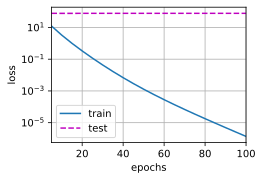

In [ ]:
train(lambd=0)

### [**使用权重衰减**]

下面，我们使用权重衰减来运行代码。
注意，在这里训练误差增大，但测试误差减小。
这正是我们期望从正则化中得到的效果。


w的L2范数是： 0.3558707535266876


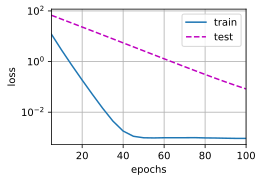

In [ ]:
train(lambd=3)

## [**简洁实现**]

由于权重衰减在神经网络优化中很常用，
深度学习框架为了便于我们使用权重衰减，
将权重衰减集成到优化算法中，以便与任何损失函数结合使用。
此外，这种集成还有计算上的好处，
允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减。
由于更新的权重衰减部分仅依赖于每个参数的当前值，
因此优化器必须至少接触每个参数一次。


在下面的代码中，我们在实例化优化器时直接通过`weight_decay`指定weight decay超参数。
默认情况下，PyTorch同时衰减权重和偏移。
这里我们只为权重设置了`weight_decay`，所以偏置参数$b$不会衰减。


In [ ]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

[**这些图看起来和我们从零开始实现权重衰减时的图相同**]。
然而，它们运行得更快，更容易实现。
对于更复杂的问题，这一好处将变得更加明显。


w的L2范数： 14.026016235351562


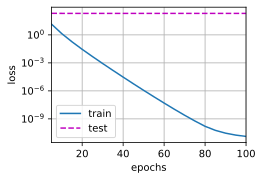

In [ ]:
train_concise(0)

w的L2范数： 0.7186794877052307


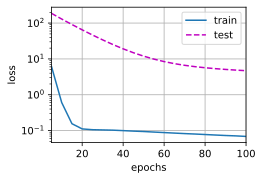

In [ ]:
train_concise(3)

到目前为止，我们只接触到一个简单线性函数的概念。
此外，由什么构成一个简单的非线性函数可能是一个更复杂的问题。
例如，[再生核希尔伯特空间（RKHS）](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
允许在非线性环境中应用为线性函数引入的工具。
不幸的是，基于RKHS的算法往往难以应用到大型、高维的数据。
在这本书中，我们将默认使用简单的启发式方法，即在深层网络的所有层上应用权重衰减。

## 小结

* 正则化是处理过拟合的常用方法：在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。
* 保持模型简单的一个特别的选择是使用$L_2$惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。
* 权重衰减功能在深度学习框架的优化器中提供。
* 在同一训练代码实现中，不同的参数集可以有不同的更新行为。

## 练习

1. 在本节的估计问题中使用$\lambda$的值进行实验。绘制训练和测试精度关于$\lambda$的函数。你观察到了什么？
1. 使用验证集来找到最佳值$\lambda$。它真的是最优值吗？这有关系吗？
1. 如果我们使用$\sum_i |w_i|$作为我们选择的惩罚（$L_1$正则化），那么更新方程会是什么样子？
1. 我们知道$\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$。你能找到类似的矩阵方程吗（见 :numref:`subsec_lin-algebra-norms` 中的Frobenius范数）？
1. 回顾训练误差和泛化误差之间的关系。除了权重衰减、增加训练数据、使用适当复杂度的模型之外，你还能想出其他什么方法来处理过拟合？
1. 在贝叶斯统计中，我们使用先验和似然的乘积，通过公式$P(w \mid x) \propto P(x \mid w) P(w)$得到后验。如何得到带正则化的$P(w)$？


[Discussions](https://discuss.d2l.ai/t/1808)


# 权重衰减
:label:`sec_weight_decay`

前一节我们描述了过拟合的问题，本节我们将介绍一些正则化模型的技术。
我们总是可以通过去收集更多的训练数据来缓解过拟合。
但这可能成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。
假设我们已经拥有尽可能多的高质量数据，我们便可以将重点放在正则化技术上。

回想一下，在多项式回归的例子（ :numref:`sec_model_selection`）中，
我们可以通过调整拟合多项式的阶数来限制模型的容量。
实际上，限制特征的数量是缓解过拟合的一种常用技术。
然而，简单地丢弃特征对于这项工作来说可能过于生硬。
我们继续思考多项式回归的例子，考虑高维输入可能发生的情况。
多项式对多变量数据的自然扩展称为*单项式*（monomials），
也可以说是变量幂的乘积。
单项式的阶数是幂的和。
例如，$x_1^2 x_2$和$x_3 x_5^2$都是3次单项式。

注意，随着阶数$d$的增长，带有阶数$d$的项数迅速增加。 
给定$k$个变量，阶数为$d$的项的个数为
${k - 1 + d} \choose {k - 1}$，即$C^{k-1}_{k-1+d} = \frac{(k-1+d)!}{(d)!(k-1)!}$。
因此即使是阶数上的微小变化，比如从$2$到$3$，也会显著增加我们模型的复杂性。
仅仅通过简单的限制特征数量（在多项式回归中体现为限制阶数），可能仍然使模型在过简单和过复杂中徘徊，
我们需要一个更细粒度的工具来调整函数的复杂性，使其达到一个合适的平衡位置。
## 范数与权重衰减

在 :numref:`subsec_lin-algebra-norms`中，
我们已经描述了$L_2$范数和$L_1$范数，
它们是更为一般的$L_p$范数的特殊情况。
(~~权重衰减是最广泛使用的正则化的技术之一~~)
在训练参数化机器学习模型时，
*权重衰减*（weight decay）是最广泛使用的正则化的技术之一，
它通常也被称为$L_2$*正则化*。
这项技术通过函数与零的距离来衡量函数的复杂度，
因为在所有函数$f$中，函数$f = 0$（所有输入都得到值$0$）
在某种意义上是最简单的。
但是我们应该如何精确地测量一个函数和零之间的距离呢？
没有一个正确的答案。
事实上，函数分析和巴拿赫空间理论的研究，都在致力于回答这个问题。

一种简单的方法是通过线性函数
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$
中的权重向量的某个范数来度量其复杂性，
例如$\| \mathbf{w} \|^2$。
要保证权重向量比较小，
最常用方法是将其范数作为惩罚项加到最小化损失的问题中。
将原来的训练目标*最小化训练标签上的预测损失*，
调整为*最小化预测损失和惩罚项之和*。
现在，如果我们的权重向量增长的太大，
我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$。
这正是我们想要的。
让我们回顾一下 :numref:`sec_linear_regression`中的线性回归例子。
我们的损失由下式给出：

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

回想一下，$\mathbf{x}^{(i)}$是样本$i$的特征，
$y^{(i)}$是样本$i$的标签，
$(\mathbf{w}, b)$是权重和偏置参数。
为了惩罚权重向量的大小，
我们必须以某种方式在损失函数中添加$\| \mathbf{w} \|^2$，
但是模型应该如何平衡这个新的额外惩罚的损失？
实际上，我们通过*正则化常数*$\lambda$来描述这种权衡，
这是一个非负超参数，我们使用验证数据拟合：

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$

对于$\lambda = 0$，我们恢复了原来的损失函数。
对于$\lambda > 0$，我们限制$\| \mathbf{w} \|$的大小。
这里我们仍然除以$2$：当我们取一个二次函数的导数时，
$2$和$1/2$会抵消，以确保更新表达式看起来既漂亮又简单。
你可能会想知道为什么我们使用平方范数而不是标准范数（即欧几里得距离）？
我们这样做是为了便于计算。
通过平方$L_2$范数，我们去掉平方根，留下权重向量每个分量的平方和。
这使得惩罚的导数很容易计算：导数的和等于和的导数。

此外，你可能会问为什么我们首先使用$L_2$范数，而不是$L_1$范数。
事实上，这个选择在整个统计领域中都是有效的和受欢迎的。
$L_2$正则化线性模型构成经典的*岭回归*（ridge regression）算法，
$L_1$正则化线性回归是统计学中类似的基本模型，
通常被称为*套索回归*（lasso regression）。
使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。
这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。
在实践中，这可能使它们对单个变量中的观测误差更为稳定。
相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，
而将其他权重清除为零。
这称为*特征选择*（feature selection），这可能是其他场景下需要的。

使用与 :eqref:`eq_linreg_batch_update`中的相同符号，
$L_2$正则化回归的小批量随机梯度下降更新如下式：

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新$\mathbf{w}$。
然而，我们同时也在试图将$\mathbf{w}$的大小缩小到零。
这就是为什么这种方法有时被称为*权重衰减*。
我们仅考虑惩罚项，优化算法在训练的每一步*衰减*权重。
与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。
较小的$\lambda$值对应较少约束的$\mathbf{w}$，
而较大的$\lambda$值对$\mathbf{w}$的约束更大。

是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，
在神经网络的不同层中也会有所不同。
通常，网络输出层的偏置项不会被正则化。

## 高维线性回归

我们通过一个简单的例子来演示权重衰减。


In [ ]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

首先，我们[**像以前一样生成一些数据**]，生成公式如下：

(**$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$**)

我们选择标签是关于输入的线性函数。
标签同时被均值为0，标准差为0.01高斯噪声破坏。
为了使过拟合的效果更加明显，我们可以将问题的维数增加到$d = 200$，
并使用一个只包含20个样本的小训练集。


In [ ]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

## 从零开始实现

下面我们将从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

### [**初始化模型参数**]

首先，我们将定义一个函数来随机初始化模型参数。


In [ ]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

### (**定义$L_2$范数惩罚**)

实现这一惩罚最方便的方法是对所有项求平方后并将它们求和。


In [ ]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

### [**定义训练代码实现**]

下面的代码将模型拟合训练数据集，并在测试数据集上进行评估。
从 :numref:`chap_linear`以来，线性网络和平方损失没有变化，
所以我们通过`d2l.linreg`和`d2l.squared_loss`导入它们。
唯一的变化是损失现在包括了惩罚项。


In [ ]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

### [**忽略正则化直接训练**]

我们现在用`lambd = 0`禁用权重衰减后运行这个代码。
注意，这里训练误差有了减少，但测试误差没有减少，
这意味着出现了严重的过拟合。


w的L2范数是： 12.791678428649902


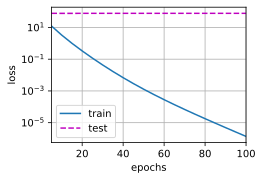

In [ ]:
train(lambd=0)

### [**使用权重衰减**]

下面，我们使用权重衰减来运行代码。
注意，在这里训练误差增大，但测试误差减小。
这正是我们期望从正则化中得到的效果。


w的L2范数是： 0.3558707535266876


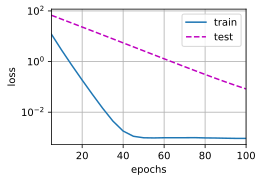

In [ ]:
train(lambd=3)

## [**简洁实现**]

由于权重衰减在神经网络优化中很常用，
深度学习框架为了便于我们使用权重衰减，
将权重衰减集成到优化算法中，以便与任何损失函数结合使用。
此外，这种集成还有计算上的好处，
允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减。
由于更新的权重衰减部分仅依赖于每个参数的当前值，
因此优化器必须至少接触每个参数一次。


在下面的代码中，我们在实例化优化器时直接通过`weight_decay`指定weight decay超参数。
默认情况下，PyTorch同时衰减权重和偏移。
这里我们只为权重设置了`weight_decay`，所以偏置参数$b$不会衰减。


In [ ]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

[**这些图看起来和我们从零开始实现权重衰减时的图相同**]。
然而，它们运行得更快，更容易实现。
对于更复杂的问题，这一好处将变得更加明显。


w的L2范数： 14.026016235351562


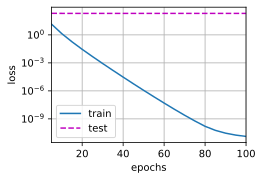

In [ ]:
train_concise(0)

w的L2范数： 0.7186794877052307


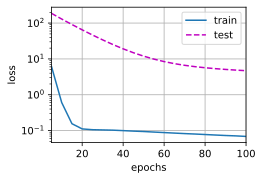

In [ ]:
train_concise(3)

到目前为止，我们只接触到一个简单线性函数的概念。
此外，由什么构成一个简单的非线性函数可能是一个更复杂的问题。
例如，[再生核希尔伯特空间（RKHS）](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
允许在非线性环境中应用为线性函数引入的工具。
不幸的是，基于RKHS的算法往往难以应用到大型、高维的数据。
在这本书中，我们将默认使用简单的启发式方法，即在深层网络的所有层上应用权重衰减。

## 小结

* 正则化是处理过拟合的常用方法：在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。
* 保持模型简单的一个特别的选择是使用$L_2$惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。
* 权重衰减功能在深度学习框架的优化器中提供。
* 在同一训练代码实现中，不同的参数集可以有不同的更新行为。

## 练习

1. 在本节的估计问题中使用$\lambda$的值进行实验。绘制训练和测试精度关于$\lambda$的函数。你观察到了什么？
1. 使用验证集来找到最佳值$\lambda$。它真的是最优值吗？这有关系吗？
1. 如果我们使用$\sum_i |w_i|$作为我们选择的惩罚（$L_1$正则化），那么更新方程会是什么样子？
1. 我们知道$\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$。你能找到类似的矩阵方程吗（见 :numref:`subsec_lin-algebra-norms` 中的Frobenius范数）？
1. 回顾训练误差和泛化误差之间的关系。除了权重衰减、增加训练数据、使用适当复杂度的模型之外，你还能想出其他什么方法来处理过拟合？
1. 在贝叶斯统计中，我们使用先验和似然的乘积，通过公式$P(w \mid x) \propto P(x \mid w) P(w)$得到后验。如何得到带正则化的$P(w)$？


[Discussions](https://discuss.d2l.ai/t/1808)


In [ ]:
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l
!pip install git+https://github.com/ipython/matplotlib-inline # installing matplotlib-inline

# 多层感知机


## 在网络中加入隐藏层

我们可以通过在网络中加入一个或多个隐藏层来克服线性模型的限制，
使其能处理更普遍的函数关系类型。
要做到这一点，最简单的方法是将许多全连接层堆叠在一起。
每一层都输出到上面的层，直到生成最后的输出。
我们可以把前$L-1$层看作表示，把最后一层看作线性预测器。
这种架构通常称为多层感知机（multilayer perceptron），通常缩写为*MLP*。
下面，我们以图的方式描述了多层感知机。

![一个单隐藏层的多层感知机，具有5个隐藏单元](http://d2l.ai/_images/mlp.svg)


这个多层感知机有4个输入，3个输出，其隐藏层包含5个隐藏单元。
输入层不涉及任何计算，因此使用此网络产生输出只需要实现隐藏层和输出层的计算。
因此，这个多层感知机中的层数为2。
注意，这两个层都是全连接的。
每个输入都会影响隐藏层中的每个神经元，
而隐藏层中的每个神经元又会影响输出层中的每个神经元。

然而，
具有全连接层的多层感知机的参数开销可能会高得令人望而却步。
即使在不改变输入或输出大小的情况下，
可能在参数节约和模型有效性之间进行权衡

## 从线性到非线性

同之前的章节一样，
我们通过矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$
来表示$n$个样本的小批量，
其中每个样本具有$d$个输入特征。
对于具有$h$个隐藏单元的单隐藏层多层感知机，
用$\mathbf{H} \in \mathbb{R}^{n \times h}$表示隐藏层的输出，
称为*隐藏表示*（hidden representations）。
在数学或代码中，$\mathbf{H}$也被称为*隐藏层变量*（hidden-layer variable）
或*隐藏变量*（hidden variable）。
因为隐藏层和输出层都是全连接的，
所以我们有隐藏层权重$\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$
和隐藏层偏置$\mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h}$
以及输出层权重$\mathbf{W}^{(2)} \in \mathbb{R}^{h \times q}$
和输出层偏置$\mathbf{b}^{(2)} \in \mathbb{R}^{1 \times q}$。
形式上，我们按如下方式计算单隐藏层多层感知机的输出
$\mathbf{O} \in \mathbb{R}^{n \times q}$：

$$
\begin{aligned}
    \mathbf{H} & = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}, \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.
\end{aligned}
$$

注意在添加隐藏层之后，模型现在需要跟踪和更新额外的参数。
可我们能从中得到什么好处呢？
你可能会惊讶地发现：在上面定义的模型里，我们没有好处！
原因很简单：上面的隐藏单元由输入的仿射函数给出，
而输出（softmax操作前）只是隐藏单元的仿射函数。
仿射函数的仿射函数本身就是仿射函数，
但是我们之前的线性模型已经能够表示任何仿射函数。

我们可以证明这一等价性，即对于任意权重值，
我们只需合并隐藏层，便可产生具有参数
$\mathbf{W} = \mathbf{W}^{(1)}\mathbf{W}^{(2)}$
和$\mathbf{b} = \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}$
的等价单层模型：

$$
\mathbf{O} = (\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})\mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W}^{(1)}\mathbf{W}^{(2)} + \mathbf{b}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)} = \mathbf{X} \mathbf{W} + \mathbf{b}.
$$

为了发挥多层架构的潜力，
我们还需要一个额外的关键要素：
在仿射变换之后对每个隐藏单元应用非线性的*激活函数*（activation function）$\sigma$。
激活函数的输出（例如，$\sigma(\cdot)$）被称为*活性值*（activations）。
一般来说，有了激活函数，就不可能再将我们的多层感知机退化成线性模型：

$$
\begin{aligned}
    \mathbf{H} & = \sigma(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}), \\
    \mathbf{O} & = \mathbf{H}\mathbf{W}^{(2)} + \mathbf{b}^{(2)}.\\
\end{aligned}
$$

由于$\mathbf{X}$中的每一行对应于小批量中的一个样本，
出于记号习惯的考量，
我们定义非线性函数$\sigma$也以按行的方式作用于其输入，
即一次计算一个样本。
我们在中
以相同的方式使用了softmax符号来表示按行操作。
但是在本节中，我们应用于隐藏层的激活函数通常不仅按行操作，也按元素操作。
这意味着在计算每一层的线性部分之后，我们可以计算每个活性值，
而不需要查看其他隐藏单元所取的值。对于大多数激活函数都是这样。

为了构建更通用的多层感知机，
我们可以继续堆叠这样的隐藏层，
例如$\mathbf{H}^{(1)} = \sigma_1(\mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)})$和$\mathbf{H}^{(2)} = \sigma_2(\mathbf{H}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)})$，
一层叠一层，从而产生更有表达能力的模型。

## 通用近似定理

多层感知机可以通过隐藏神经元，捕捉到输入之间复杂的相互作用，
这些神经元依赖于每个输入的值。
我们可以很容易地设计隐藏节点来执行任意计算。
例如，在一对输入上进行基本逻辑操作，多层感知机是通用近似器。
即使是网络只有一个隐藏层，给定足够的神经元和正确的权重，
我们可以对任意函数建模，尽管实际中学习该函数是很困难的。
神经网络有点像C语言。
C语言和任何其他现代编程语言一样，能够表达任何可计算的程序。
但实际上，想出一个符合规范的程序才是最困难的部分。

而且，虽然一个单隐层网络能学习任何函数，
但并不意味着我们应该尝试使用单隐藏层网络来解决所有问题。
事实上，通过使用更深（而不是更广）的网络，我们可以更容易地逼近许多函数。
我们将在后面的章节中进行更细致的讨论。

## 激活函数

激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活，
它们将输入信号转换为输出的可微运算。
大多数激活函数都是非线性的。
由于激活函数是深度学习的基础，下面(**简要介绍一些常见的激活函数**)。


In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

### ReLU函数

最受欢迎的激活函数是*修正线性单元*（Rectified linear unit，*ReLU*），
因为它实现简单，同时在各种预测任务中表现良好。
[**ReLU提供了一种非常简单的非线性变换**]。
给定元素$x$，ReLU函数被定义为该元素与$0$的最大值：

(**$$\operatorname{ReLU}(x) = \max(x, 0).$$**)

通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素。
为了直观感受一下，我们可以画出函数的曲线图。
正如从图中所看到，激活函数是分段线性的。


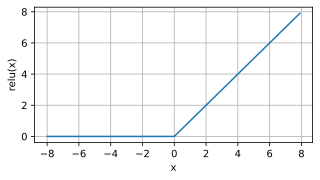

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1。
注意，当输入值精确等于0时，ReLU函数不可导。
在此时，我们默认使用左侧的导数，即当输入为0时导数为0。
我们可以忽略这种情况，因为输入可能永远都不会是0。
这里引用一句古老的谚语，“如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”，
这个观点正好适用于这里。
下面我们绘制ReLU函数的导数。


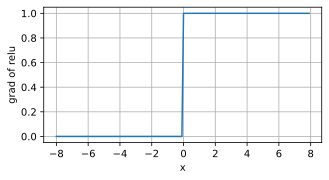

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。
这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题（稍后将详细介绍）。

注意，ReLU函数有许多变体，包括*参数化ReLU*（Parameterized ReLU，*pReLU*）
函数。
该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

### sigmoid函数

[**对于一个定义域在$\mathbb{R}$中的输入，
*sigmoid函数*将输入变换为区间(0, 1)上的输出**]。
因此，sigmoid通常称为*挤压函数*（squashing function）：
它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

**$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$**

在最早的神经网络中，科学家们感兴趣的是对“激发”或“不激发”的生物神经元进行建模。
因此，这一领域的先驱可以一直追溯到人工神经元的发明者麦卡洛克和皮茨，他们专注于阈值单元。
阈值单元在其输入低于某个阈值时取值0，当输入超过阈值时取值1。

当人们逐渐关注到到基于梯度的学习时，
sigmoid函数是一个自然的选择，因为它是一个平滑的、可微的阈值单元近似。
当我们想要将输出视作二元分类问题的概率时，
sigmoid仍然被广泛用作输出单元上的激活函数
（你可以将sigmoid视为softmax的特例）。
然而，sigmoid在隐藏层中已经较少使用，
它在大部分时候被更简单、更容易训练的ReLU所取代。
在后面关于循环神经网络的章节中，我们将描述利用sigmoid单元来控制时序信息流的架构。

下面，我们绘制sigmoid函数。
注意，当输入接近0时，sigmoid函数接近线性变换。


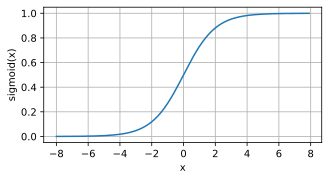

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

sigmoid函数的导数为下面的公式：

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

sigmoid函数的导数图像如下所示。
注意，当输入为0时，sigmoid函数的导数达到最大值0.25；
而输入在任一方向上越远离0点时，导数越接近0。


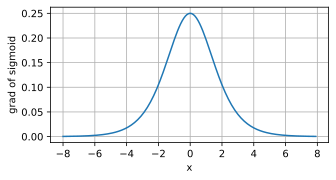

In [ ]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### tanh函数

与sigmoid函数类似，
[**tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上**]。
tanh函数的公式如下：

(**$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$**)

下面我们绘制tanh函数。
注意，当输入在0附近时，tanh函数接近线性变换。
函数的形状类似于sigmoid函数，
不同的是tanh函数关于坐标系原点中心对称。


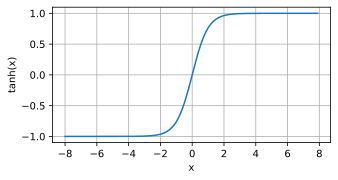

In [ ]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

tanh函数的导数是：

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

tanh函数的导数图像如下所示。
当输入接近0时，tanh函数的导数接近最大值1。
与我们在sigmoid函数图像中看到的类似，
输入在任一方向上越远离0点，导数越接近0。


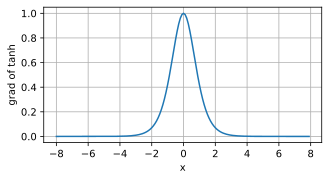

In [ ]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

# 多层感知机的简洁实现
:label:`sec_mlp_concise`

正如你所期待的，我们可以(**通过高级API更简洁地实现多层感知机**)。


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 模型

与softmax回归的简洁实现（ :numref:`sec_softmax_concise`）相比，
唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是[**隐藏层**]，它(**包含256个隐藏单元，并使用了ReLU激活函数**)。
第二层是输出层。


In [ ]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

[**训练过程**]的实现与我们实现softmax回归时完全相同，
这种模块化设计使我们能够将与模型架构有关的内容独立出来。


In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

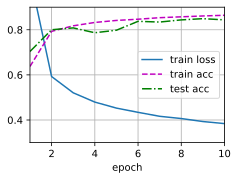

In [ ]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 小结

* 我们可以使用高级API更简洁地实现多层感知机。
* 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现里增加了带有激活函数的隐藏层。

## 练习

1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？


# 多层感知机的简洁实现
:label:`sec_mlp_concise`

正如你所期待的，我们可以(**通过高级API更简洁地实现多层感知机**)。


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 模型

与softmax回归的简洁实现（ :numref:`sec_softmax_concise`）相比，
唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是[**隐藏层**]，它(**包含256个隐藏单元，并使用了ReLU激活函数**)。
第二层是输出层。


In [ ]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

[**训练过程**]的实现与我们实现softmax回归时完全相同，
这种模块化设计使我们能够将与模型架构有关的内容独立出来。


In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

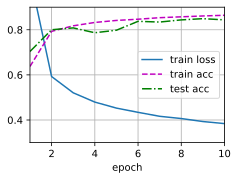

In [ ]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

# 模型选择、欠拟合和过拟合

作为机器学习科学家，我们的目标是发现*模式*（pattern）。
但是，我们如何才能确定模型是真正发现了一种泛化的模式，
而不是简单地记住了数据呢？
例如，我们想要在患者的基因数据与痴呆状态之间寻找模式，
其中标签是从集合$\{\text{痴呆}, \text{轻度认知障碍}, \text{健康}\}$中提取的。
因为基因可以唯一确定每个个体（不考虑双胞胎），
所以在这个任务中是有可能记住整个数据集的。

我们不想让模型只会做这样的事情：“那是鲍勃！我记得他！他有痴呆症！”。
原因很简单：当我们将来部署该模型时，模型需要判断从未见过的患者。
只有当模型真正发现了一种泛化模式时，才会作出有效的预测。

更正式地说，我们的目标是发现某些模式，
这些模式捕捉到了我们训练集潜在总体的规律。
如果成功做到了这点，即使是对以前从未遇到过的个体，
模型也可以成功地评估风险。
如何发现可以泛化的模式是机器学习的根本问题。

困难在于，当我们训练模型时，我们只能访问数据中的小部分样本。
最大的公开图像数据集包含大约一百万张图像。
而在大部分时候，我们只能从数千或数万个数据样本中学习。
在大型医院系统中，我们可能会访问数十万份医疗记录。
当我们使用有限的样本时，可能会遇到这样的问题：
当收集到更多的数据时，会发现之前找到的明显关系并不成立。

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为*过拟合*（overfitting），
用于对抗过拟合的技术称为*正则化*（regularization）。
在前面的章节中，你可能在用Fashion-MNIST数据集做实验时已经观察到了这种过拟合现象。
在实验中调整模型架构或超参数时，你会发现：
如果有足够多的神经元、层数和训练迭代周期，
模型最终可以在训练集上达到完美的精度，此时测试集的准确性却下降了。

## 训练误差和泛化误差

为了进一步讨论这一现象，我们需要了解训练误差和泛化误差。
*训练误差*（training error）是指，
模型在训练数据集上计算得到的误差。
*泛化误差*（generalization error）是指，
模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

问题是，我们永远不能准确地计算出泛化误差。
这是因为无限多的数据样本是一个虚构的对象。
在实际中，我们只能通过将模型应用于一个独立的测试集来估计泛化误差，
该测试集由随机选取的、未曾在训练集中出现的数据样本构成。

下面的三个思维实验将有助于更好地说明这种情况。
假设一个大学生正在努力准备期末考试。
一个勤奋的学生会努力做好练习，并利用往年的考试题目来测试自己的能力。
尽管如此，在过去的考试题目上取得好成绩并不能保证他会在真正考试时发挥出色。
例如，学生可能试图通过死记硬背考题的答案来做准备。
他甚至可以完全记住过去考试的答案。
另一名学生可能会通过试图理解给出某些答案的原因来做准备。
在大多数情况下，后者会考得更好。

类似地，考虑一个简单地使用查表法来回答问题的模型。
如果允许的输入集合是离散的并且相当小，
那么也许在查看许多训练样本后，该方法将执行得很好。
但当这个模型面对从未见过的例子时，它表现的可能比随机猜测好不到哪去。
这是因为输入空间太大了，远远不可能记住每一个可能的输入所对应的答案。
例如，考虑$28\times28$的灰度图像。
如果每个像素可以取$256$个灰度值中的一个，
则有$256^{784}$个可能的图像。
这意味着指甲大小的低分辨率灰度图像的数量比宇宙中的原子要多得多。
即使我们可能遇到这样的数据，我们也不可能存储整个查找表。

最后，考虑对掷硬币的结果（类别0：正面，类别1：反面）进行分类的问题。
假设硬币是公平的，无论我们想出什么算法，泛化误差始终是$\frac{1}{2}$。
然而，对于大多数算法，我们应该期望训练误差会更低（取决于运气）。
考虑数据集{0，1，1，1，0，1}。
我们的算法不需要额外的特征，将倾向于总是预测*多数类*，
从我们有限的样本来看，它似乎是1占主流。
在这种情况下，总是预测类1的模型将产生$\frac{1}{3}$的误差，
这比我们的泛化误差要好得多。
当我们逐渐增加数据量，正面比例明显偏离$\frac{1}{2}$的可能性将会降低，
我们的训练误差将与泛化误差相匹配。

### 统计学习理论

由于泛化是机器学习中的基本问题，
许多数学家和理论家毕生致力于研究描述这一现象的形式理论。
在[同名定理（eponymous theorem）](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem)中，
格里文科和坎特利推导出了训练误差收敛到泛化误差的速率。
在一系列开创性的论文中，
[Vapnik和Chervonenkis](https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_theory)
将这一理论扩展到更一般种类的函数。
这项工作为统计学习理论奠定了基础。

在我们目前已探讨、并将在之后继续探讨的监督学习情景中，
我们假设训练数据和测试数据都是从相同的分布中独立提取的。
这通常被称为*独立同分布假设*（i.i.d. assumption），
这意味着对数据进行采样的过程没有进行“记忆”。
换句话说，抽取的第2个样本和第3个样本的相关性，
并不比抽取的第2个样本和第200万个样本的相关性更强。

要成为一名优秀的机器学习科学家需要具备批判性思考能力。
你应该已经从这个假设中找出漏洞，即很容易找出假设失效的情况。
如果我们根据从加州大学旧金山分校医学中心的患者数据训练死亡风险预测模型，
并将其应用于马萨诸塞州综合医院的患者数据，结果会怎么样？
这两个数据的分布可能不完全一样。
此外，抽样过程可能与时间有关。
比如当我们对微博的主题进行分类时，
新闻周期会使得正在讨论的话题产生时间依赖性，从而违反独立性假设。

有时候我们即使轻微违背独立同分布假设，模型仍将继续运行得非常好。
比如，我们有许多有用的工具已经应用于现实，如人脸识别、语音识别和语言翻译。
毕竟，几乎所有现实的应用都至少涉及到一些违背独立同分布假设的情况。

有些违背独立同分布假设的行为肯定会带来麻烦。
比如，我们试图只用来自大学生的人脸数据来训练一个人脸识别系统，
然后想要用它来监测疗养院中的老人。
这不太可能有效，因为大学生看起来往往与老年人有很大的不同。

在接下来的章节中，我们将讨论因违背独立同分布假设而引起的问题。
目前，即使认为独立同分布假设是理所当然的，理解泛化性也是一个困难的问题。
此外，能够解释深层神经网络泛化性能的理论基础，
也仍在继续困扰着学习理论领域最伟大的学者们。

当我们训练模型时，我们试图找到一个能够尽可能拟合训练数据的函数。
但是如果它执行地“太好了”，而不能对看不见的数据做到很好泛化，就会导致过拟合。
这种情况正是我们想要避免或控制的。
深度学习中有许多启发式的技术旨在防止过拟合。

### 模型复杂性

当我们有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近。
当我们有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。
模型复杂性由什么构成是一个复杂的问题。
一个模型是否能很好地泛化取决于很多因素。
例如，具有更多参数的模型可能被认为更复杂，
参数有更大取值范围的模型可能更为复杂。
通常对于神经网络，我们认为需要更多训练迭代的模型比较复杂，
而需要“早停”（early stopping）的模型（即较少训练迭代周期）就不那么复杂。

我们很难比较本质上不同大类的模型之间（例如，决策树与神经网络）的复杂性。
就目前而言，一条简单的经验法则相当有用：
统计学家认为，能够轻松解释任意事实的模型是复杂的，
而表达能力有限但仍能很好地解释数据的模型可能更有现实用途。
在哲学上，这与波普尔的科学理论的可证伪性标准密切相关：
如果一个理论能拟合数据，且有具体的测试可以用来证明它是错误的，那么它就是好的。
这一点很重要，因为所有的统计估计都是*事后归纳*。
也就是说，我们在观察事实之后进行估计，因此容易受到相关谬误的影响。
目前，我们将把哲学放在一边，坚持更切实的问题。

在本节中，为了给你一些直观的印象，我们将重点介绍几个倾向于影响模型泛化的因素：

1. 可调整参数的数量。当可调整参数的数量（有时称为*自由度*）很大时，模型往往更容易过拟合。
1. 参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。
1. 训练样本的数量。即使你的模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

## 模型选择

在机器学习中，我们通常在评估几个候选模型后选择最终的模型。
这个过程叫做*模型选择*。
有时，需要进行比较的模型在本质上是完全不同的（比如，决策树与线性模型）。
又有时，我们需要比较不同的超参数设置下的同一类模型。

例如，训练多层感知机模型时，我们可能希望比较具有
不同数量的隐藏层、不同数量的隐藏单元以及不同的激活函数组合的模型。
为了确定候选模型中的最佳模型，我们通常会使用验证集。

### 验证集

原则上，在我们确定所有的超参数之前，我们不希望用到测试集。
如果我们在模型选择过程中使用测试数据，可能会有过拟合测试数据的风险，那就麻烦大了。
如果我们过拟合了训练数据，还可以在测试数据上的评估来判断过拟合。
但是如果我们过拟合了测试数据，我们又该怎么知道呢？

因此，我们决不能依靠测试数据进行模型选择。
然而，我们也不能仅仅依靠训练数据来选择模型，因为我们无法估计训练数据的泛化误差。

在实际应用中，情况变得更加复杂。
虽然理想情况下我们只会使用测试数据一次，
以评估最好的模型或比较一些模型效果，但现实是测试数据很少在使用一次后被丢弃。
我们很少能有充足的数据来对每一轮实验采用全新测试集。

解决此问题的常见做法是将我们的数据分成三份，
除了训练和测试数据集之外，还增加一个*验证数据集*（validation dataset），
也叫*验证集*（validation set）。
但现实是验证数据和测试数据之间的边界模糊得令人担忧。
除非另有明确说明，否则在这本书的实验中，
我们实际上是在使用应该被正确地称为训练数据和验证数据的数据集，
并没有真正的测试数据集。
因此，书中每次实验报告的准确度都是验证集准确度，而不是测试集准确度。

### $K$折交叉验证

当训练数据稀缺时，我们甚至可能无法提供足够的数据来构成一个合适的验证集。
这个问题的一个流行的解决方案是采用$K$*折交叉验证*。
这里，原始训练数据被分成$K$个不重叠的子集。
然后执行$K$次模型训练和验证，每次在$K-1$个子集上进行训练，
并在剩余的一个子集（在该轮中没有用于训练的子集）上进行验证。
最后，通过对$K$次实验的结果取平均来估计训练和验证误差。

## 欠拟合还是过拟合？

当我们比较训练和验证误差时，我们要注意两种常见的情况。
首先，我们要注意这样的情况：训练误差和验证误差都很严重，
但它们之间仅有一点差距。
如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足），
无法捕获试图学习的模式。
此外，由于我们的训练和验证误差之间的*泛化误差*很小，
我们有理由相信可以用一个更复杂的模型降低训练误差。
这种现象被称为*欠拟合*（underfitting）。

另一方面，当我们的训练误差明显低于验证误差时要小心，
这表明严重的*过拟合*（overfitting）。
注意，*过拟合*并不总是一件坏事。
特别是在深度学习领域，众所周知，
最好的预测模型在训练数据上的表现往往比在保留（验证）数据上好得多。
最终，我们通常更关心验证误差，而不是训练误差和验证误差之间的差距。

是否过拟合或欠拟合可能取决于模型复杂性和可用训练数据集的大小，
这两个点将在下面进行讨论。

### 模型复杂性

为了说明一些关于过拟合和模型复杂性的经典直觉，
我们给出一个多项式的例子。
给定由单个特征$x$和对应实数标签$y$组成的训练数据，
我们试图找到下面的$d$阶多项式来估计标签$y$。

$$\hat{y}= \sum_{i=0}^d x^i w_i$$

这只是一个线性回归问题，我们的特征是$x$的幂给出的，
模型的权重是$w_i$给出的，偏置是$w_0$给出的
（因为对于所有的$x$都有$x^0 = 1$）。
由于这只是一个线性回归问题，我们可以使用平方误差作为我们的损失函数。

高阶多项式函数比低阶多项式函数复杂得多。
高阶多项式的参数较多，模型函数的选择范围较广。
因此在固定训练数据集的情况下，
高阶多项式函数相对于低阶多项式的训练误差应该始终更低（最坏也是相等）。
事实上，当数据样本包含了$x$的不同值时，
函数阶数等于数据样本数量的多项式函数可以完美拟合训练集。
在 :numref:`fig_capacity_vs_error`中，
我们直观地描述了多项式的阶数和欠拟合与过拟合之间的关系。


![模型复杂度对欠拟合和过拟合的影响](../img/capacity-vs-error.svg)
:label:`fig_capacity_vs_error`

### 数据集大小

另一个重要因素是数据集的大小。
训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。
随着训练数据量的增加，泛化误差通常会减小。
此外，一般来说，更多的数据不会有什么坏处。
对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。
给出更多的数据，我们可能会尝试拟合一个更复杂的模型。
能够拟合更复杂的模型可能是有益的。
如果没有足够的数据，简单的模型可能更有用。
对于许多任务，深度学习只有在有数千个训练样本时才优于线性模型。
从一定程度上来说，深度学习目前的生机要归功于
廉价存储、互联设备以及数字化经济带来的海量数据集。

## 多项式回归

我们现在可以(**通过多项式拟合来探索这些概念**)。


In [ ]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### 生成数据集

给定$x$，我们将[**使用以下三阶多项式来生成训练和测试数据的标签：**]

(**$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$**)

噪声项$\epsilon$服从均值为0且标准差为0.1的正态分布。
在优化的过程中，我们通常希望避免非常大的梯度值或损失值。
这就是我们将特征从$x^i$调整为$\frac{x^i}{i!}$的原因，
这样可以避免很大的$i$带来的特别大的指数值。
我们将为训练集和测试集各生成100个样本。


In [ ]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

同样，存储在`poly_features`中的单项式由gamma函数重新缩放，
其中$\Gamma(n)=(n-1)!$。
从生成的数据集中[**查看一下前2个样本**]，
第一个值是与偏置相对应的常量特征。


In [ ]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

In [ ]:
features[:2], poly_features[:2, :], labels[:2]

(tensor([[0.8069],
         [0.1614]]),
 tensor([[1.0000e+00, 8.0685e-01, 3.2550e-01, 8.7544e-02, 1.7659e-02, 2.8496e-03,
          3.8320e-04, 4.4169e-05, 4.4548e-06, 3.9937e-07, 3.2223e-08, 2.3636e-09,
          1.5892e-10, 9.8635e-12, 5.6845e-13, 3.0577e-14, 1.5419e-15, 7.3184e-17,
          3.2805e-18, 1.3931e-19],
         [1.0000e+00, 1.6137e-01, 1.3020e-02, 7.0031e-04, 2.8252e-05, 9.1177e-07,
          2.4522e-08, 5.6528e-10, 1.1402e-11, 2.0444e-13, 3.2989e-15, 4.8394e-17,
          6.5077e-19, 8.0778e-21, 9.3107e-23, 1.0016e-24, 1.0102e-26, 9.5887e-29,
          8.5961e-31, 7.3007e-33]]),
 tensor([5.2975, 5.0520]))

### 对模型进行训练和测试

首先让我们[**实现一个函数来评估模型在给定数据集上的损失**]。


In [ ]:
def evaluate_loss(net, data_iter, loss):  
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

现在[**定义训练函数**]。


In [ ]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

### [**三阶多项式函数拟合(正常)**]

我们将首先使用三阶多项式函数，它与数据生成函数的阶数相同。
结果表明，该模型能有效降低训练损失和测试损失。
学习到的模型参数也接近真实值$w = [5, 1.2, -3.4, 5.6]$。


weight: [[ 5.0007887  1.188556  -3.4069114  5.598693 ]]


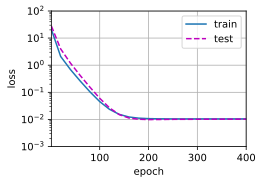

In [ ]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

### [**线性函数拟合(欠拟合)**]

让我们再看看线性函数拟合，减少该模型的训练损失相对困难。
在最后一个迭代周期完成后，训练损失仍然很高。
当用来拟合非线性模式（如这里的三阶多项式函数）时，线性模型容易欠拟合。


weight: [[3.4582274 3.7159562]]


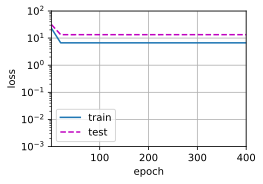

In [ ]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

### [**高阶多项式函数拟合(过拟合)**]

现在，让我们尝试使用一个阶数过高的多项式来训练模型。
在这种情况下，没有足够的数据用于学到高阶系数应该具有接近于零的值。
因此，这个过于复杂的模型会轻易受到训练数据中噪声的影响。
虽然训练损失可以有效地降低，但测试损失仍然很高。
结果表明，复杂模型对数据造成了过拟合。


weight: [[ 4.9602804   1.2281249  -3.1678302   5.282293   -0.78401726  1.3070852
   0.05391492  0.08786786 -0.16313833 -0.02856293 -0.17763665  0.05075314
   0.14930737  0.1516932   0.11134355  0.18925151 -0.14107536  0.04467897
  -0.01062597 -0.09159212]]


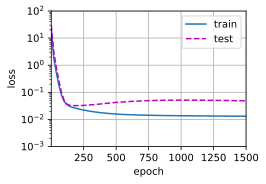

In [ ]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

# 权重衰减


前一节我们描述了过拟合的问题，本节我们将介绍一些正则化模型的技术。
我们总是可以通过去收集更多的训练数据来缓解过拟合。
但这可能成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。
假设我们已经拥有尽可能多的高质量数据，我们便可以将重点放在正则化技术上。

回想一下，在多项式回归的例子（ ）中，
我们可以通过调整拟合多项式的阶数来限制模型的容量。
实际上，限制特征的数量是缓解过拟合的一种常用技术。
然而，简单地丢弃特征对于这项工作来说可能过于生硬。
我们继续思考多项式回归的例子，考虑高维输入可能发生的情况。
多项式对多变量数据的自然扩展称为*单项式*（monomials），
也可以说是变量幂的乘积。
单项式的阶数是幂的和。
例如，$x_1^2 x_2$和$x_3 x_5^2$都是3次单项式。

注意，随着阶数$d$的增长，带有阶数$d$的项数迅速增加。 
给定$k$个变量，阶数为$d$的项的个数为
${k - 1 + d} \choose {k - 1}$，即$C^{k-1}_{k-1+d} = \frac{(k-1+d)!}{(d)!(k-1)!}$。
因此即使是阶数上的微小变化，比如从$2$到$3$，也会显著增加我们模型的复杂性。
仅仅通过简单的限制特征数量（在多项式回归中体现为限制阶数），可能仍然使模型在过简单和过复杂中徘徊，
我们需要一个更细粒度的工具来调整函数的复杂性，使其达到一个合适的平衡位置。
## 范数与权重衰减

我们已经描述了$L_2$范数和$L_1$范数，
它们是更为一般的$L_p$范数的特殊情况。
(~~权重衰减是最广泛使用的正则化的技术之一~~)
在训练参数化机器学习模型时，
*权重衰减*（weight decay）是最广泛使用的正则化的技术之一，
它通常也被称为$L_2$*正则化*。
这项技术通过函数与零的距离来衡量函数的复杂度，
因为在所有函数$f$中，函数$f = 0$（所有输入都得到值$0$）
在某种意义上是最简单的。
但是我们应该如何精确地测量一个函数和零之间的距离呢？
没有一个正确的答案。
事实上，函数分析和巴拿赫空间理论的研究，都在致力于回答这个问题。

一种简单的方法是通过线性函数
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$
中的权重向量的某个范数来度量其复杂性，
例如$\| \mathbf{w} \|^2$。
要保证权重向量比较小，
最常用方法是将其范数作为惩罚项加到最小化损失的问题中。
将原来的训练目标*最小化训练标签上的预测损失*，
调整为*最小化预测损失和惩罚项之和*。
现在，如果我们的权重向量增长的太大，
我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$。
这正是我们想要的。
让我们回顾一下中的线性回归例子。
我们的损失由下式给出：

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

回想一下，$\mathbf{x}^{(i)}$是样本$i$的特征，
$y^{(i)}$是样本$i$的标签，
$(\mathbf{w}, b)$是权重和偏置参数。
为了惩罚权重向量的大小，
我们必须以某种方式在损失函数中添加$\| \mathbf{w} \|^2$，
但是模型应该如何平衡这个新的额外惩罚的损失？
实际上，我们通过*正则化常数*$\lambda$来描述这种权衡，
这是一个非负超参数，我们使用验证数据拟合：

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$

对于$\lambda = 0$，我们恢复了原来的损失函数。
对于$\lambda > 0$，我们限制$\| \mathbf{w} \|$的大小。
这里我们仍然除以$2$：当我们取一个二次函数的导数时，
$2$和$1/2$会抵消，以确保更新表达式看起来既漂亮又简单。
你可能会想知道为什么我们使用平方范数而不是标准范数（即欧几里得距离）？
我们这样做是为了便于计算。
通过平方$L_2$范数，我们去掉平方根，留下权重向量每个分量的平方和。
这使得惩罚的导数很容易计算：导数的和等于和的导数。

此外，你可能会问为什么我们首先使用$L_2$范数，而不是$L_1$范数。
事实上，这个选择在整个统计领域中都是有效的和受欢迎的。
$L_2$正则化线性模型构成经典的*岭回归*（ridge regression）算法，
$L_1$正则化线性回归是统计学中类似的基本模型，
通常被称为*套索回归*（lasso regression）。
使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。
这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。
在实践中，这可能使它们对单个变量中的观测误差更为稳定。
相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，
而将其他权重清除为零。
这称为*特征选择*（feature selection），这可能是其他场景下需要的。

使用与中的相同符号，
$L_2$正则化回归的小批量随机梯度下降更新如下式：

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新$\mathbf{w}$。
然而，我们同时也在试图将$\mathbf{w}$的大小缩小到零。
这就是为什么这种方法有时被称为*权重衰减*。
我们仅考虑惩罚项，优化算法在训练的每一步*衰减*权重。
与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。
较小的$\lambda$值对应较少约束的$\mathbf{w}$，
而较大的$\lambda$值对$\mathbf{w}$的约束更大。

是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，
在神经网络的不同层中也会有所不同。
通常，网络输出层的偏置项不会被正则化。

通常 $\eta\lambda < 1$ ，在深度学习中通常叫做权重衰退

## 高维线性回归

我们通过一个简单的例子来演示权重衰减。


In [ ]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

首先，我们[**像以前一样生成一些数据**]，生成公式如下：

(**$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$**)

我们选择标签是关于输入的线性函数。
标签同时被均值为0，标准差为0.01高斯噪声破坏。
为了使过拟合的效果更加明显，我们可以将问题的维数增加到$d = 200$，
并使用一个只包含20个样本的小训练集。


In [ ]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

## 从零开始实现

下面我们将从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

### [**初始化模型参数**]

首先，我们将定义一个函数来随机初始化模型参数。


In [ ]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

### (**定义$L_2$范数惩罚**)

实现这一惩罚最方便的方法是对所有项求平方后并将它们求和。


In [ ]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

### [**定义训练代码实现**]

下面的代码将模型拟合训练数据集，并在测试数据集上进行评估。
从 :numref:`chap_linear`以来，线性网络和平方损失没有变化，
所以我们通过`d2l.linreg`和`d2l.squared_loss`导入它们。
唯一的变化是损失现在包括了惩罚项。


In [ ]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

### [**忽略正则化直接训练**]

我们现在用`lambd = 0`禁用权重衰减后运行这个代码。
注意，这里训练误差有了减少，但测试误差没有减少，
这意味着出现了严重的过拟合。


w的L2范数是： 12.791678428649902


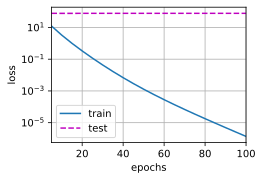

In [ ]:
train(lambd=0)

### [**使用权重衰减**]

下面，我们使用权重衰减来运行代码。
注意，在这里训练误差增大，但测试误差减小。
这正是我们期望从正则化中得到的效果。


w的L2范数是： 0.3558707535266876


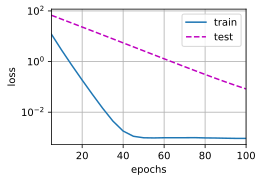

In [ ]:
train(lambd=3)

## [**简洁实现**]

由于权重衰减在神经网络优化中很常用，
深度学习框架为了便于我们使用权重衰减，
将权重衰减集成到优化算法中，以便与任何损失函数结合使用。
此外，这种集成还有计算上的好处，
允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减。
由于更新的权重衰减部分仅依赖于每个参数的当前值，
因此优化器必须至少接触每个参数一次。


在下面的代码中，我们在实例化优化器时直接通过`weight_decay`指定weight decay超参数。
默认情况下，PyTorch同时衰减权重和偏移。
这里我们只为权重设置了`weight_decay`，所以偏置参数$b$不会衰减。


In [ ]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

[**这些图看起来和我们从零开始实现权重衰减时的图相同**]。
然而，它们运行得更快，更容易实现。
对于更复杂的问题，这一好处将变得更加明显。


w的L2范数： 14.026016235351562


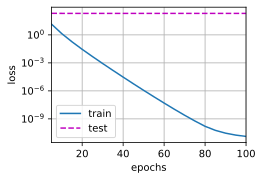

In [ ]:
train_concise(0)

w的L2范数： 0.7186794877052307


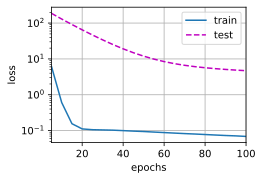

In [ ]:
train_concise(3)

到目前为止，我们只接触到一个简单线性函数的概念。
此外，由什么构成一个简单的非线性函数可能是一个更复杂的问题。
例如，[再生核希尔伯特空间（RKHS）](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
允许在非线性环境中应用为线性函数引入的工具。
不幸的是，基于RKHS的算法往往难以应用到大型、高维的数据。
在这本书中，我们将默认使用简单的启发式方法，即在深层网络的所有层上应用权重衰减。

## 小结

* 正则化是处理过拟合的常用方法：在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。
* 保持模型简单的一个特别的选择是使用$L_2$惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。
* 权重衰减功能在深度学习框架的优化器中提供。
* 在同一训练代码实现中，不同的参数集可以有不同的更新行为。

## 练习

1. 在本节的估计问题中使用$\lambda$的值进行实验。绘制训练和测试精度关于$\lambda$的函数。你观察到了什么？
1. 使用验证集来找到最佳值$\lambda$。它真的是最优值吗？这有关系吗？
1. 如果我们使用$\sum_i |w_i|$作为我们选择的惩罚（$L_1$正则化），那么更新方程会是什么样子？
1. 我们知道$\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$。你能找到类似的矩阵方程吗（见 :numref:`subsec_lin-algebra-norms` 中的Frobenius范数）？
1. 回顾训练误差和泛化误差之间的关系。除了权重衰减、增加训练数据、使用适当复杂度的模型之外，你还能想出其他什么方法来处理过拟合？
1. 在贝叶斯统计中，我们使用先验和似然的乘积，通过公式$P(w \mid x) \propto P(x \mid w) P(w)$得到后验。如何得到带正则化的$P(w)$？


# 暂退法（Dropout）
:label:`sec_dropout`

在 :numref:`sec_weight_decay` 中，
我们介绍了通过惩罚权重的$L_2$范数来正则化统计模型的经典方法。
在概率角度看，我们可以通过以下论证来证明这一技术的合理性：
我们已经假设了一个先验，即权重的值取自均值为0的高斯分布。
更直观的是，我们希望模型深度挖掘特征，即将其权重分散到许多特征中，
而不是过于依赖少数潜在的虚假关联。

## 重新审视过拟合

当面对更多的特征而样本不足时，线性模型往往会过拟合。
相反，当给出更多样本而不是特征，通常线性模型不会过拟合。
不幸的是，线性模型泛化的可靠性是有代价的。
简单地说，线性模型没有考虑到特征之间的交互作用。
对于每个特征，线性模型必须指定正的或负的权重，而忽略其他特征。

泛化性和灵活性之间的这种基本权衡被描述为*偏差-方差权衡*（bias-variance tradeoff）。
线性模型有很高的偏差：它们只能表示一小类函数。
然而，这些模型的方差很低：它们在不同的随机数据样本上可以得出相似的结果。

深度神经网络位于偏差-方差谱的另一端。
与线性模型不同，神经网络并不局限于单独查看每个特征，而是学习特征之间的交互。
例如，神经网络可能推断“尼日利亚”和“西联汇款”一起出现在电子邮件中表示垃圾邮件，
但单独出现则不表示垃圾邮件。

即使我们有比特征多得多的样本，深度神经网络也有可能过拟合。
2017年，一组研究人员通过在随机标记的图像上训练深度网络。
这展示了神经网络的极大灵活性，因为人类很难将输入和随机标记的输出联系起来，
但通过随机梯度下降优化的神经网络可以完美地标记训练集中的每一幅图像。
想一想这意味着什么？
假设标签是随机均匀分配的，并且有10个类别，那么分类器在测试数据上很难取得高于10%的精度，
那么这里的泛化差距就高达90%，如此严重的过拟合。

深度网络的泛化性质令人费解，而这种泛化性质的数学基础仍然是悬而未决的研究问题。
我们鼓励喜好研究理论的读者更深入地研究这个主题。
本节，我们将着重对实际工具的探究，这些工具倾向于改进深层网络的泛化性。

## 扰动的稳健性

在探究泛化性之前，我们先来定义一下什么是一个“好”的预测模型？
我们期待“好”的预测模型能在未知的数据上有很好的表现：
经典泛化理论认为，为了缩小训练和测试性能之间的差距，应该以简单的模型为目标。
简单性以较小维度的形式展现，
我们在 :numref:`sec_model_selection` 讨论线性模型的单项式函数时探讨了这一点。
此外，正如我们在 :numref:`sec_weight_decay` 中讨论权重衰减（$L_2$正则化）时看到的那样，
参数的范数也代表了一种有用的简单性度量。

简单性的另一个角度是平滑性，即函数不应该对其输入的微小变化敏感。
例如，当我们对图像进行分类时，我们预计向像素添加一些随机噪声应该是基本无影响的。
1995年，克里斯托弗·毕晓普证明了
具有输入噪声的训练等价于Tikhonov正则化 :cite:`Bishop.1995`。
这项工作用数学证实了“要求函数光滑”和“要求函数对输入的随机噪声具有适应性”之间的联系。

然后在2014年，斯里瓦斯塔瓦等人 :cite:`Srivastava.Hinton.Krizhevsky.ea.2014`
就如何将毕晓普的想法应用于网络的内部层提出了一个想法：
在训练过程中，他们建议在计算后续层之前向网络的每一层注入噪声。
因为当训练一个有多层的深层网络时，注入噪声只会在输入-输出映射上增强平滑性。

这个想法被称为*暂退法*（dropout）。
暂退法在前向传播过程中，计算每一内部层的同时注入噪声，这已经成为训练神经网络的常用技术。
这种方法之所以被称为*暂退法*，因为我们从表面上看是在训练过程中丢弃（drop out）一些神经元。
在整个训练过程的每一次迭代中，标准暂退法包括在计算下一层之前将当前层中的一些节点置零。

需要说明的是，暂退法的原始论文提到了一个关于有性繁殖的类比：
神经网络过拟合与每一层都依赖于前一层激活值相关，称这种情况为“共适应性”。
作者认为，暂退法会破坏共适应性，就像有性生殖会破坏共适应的基因一样。

那么关键的挑战就是如何注入这种噪声。
一种想法是以一种*无偏向*（unbiased）的方式注入噪声。
这样在固定住其他层时，每一层的期望值等于没有噪音时的值。

在毕晓普的工作中，他将高斯噪声添加到线性模型的输入中。
在每次训练迭代中，他将从均值为零的分布$\epsilon \sim \mathcal{N}(0,\sigma^2)$
采样噪声添加到输入$\mathbf{x}$，
从而产生扰动点$\mathbf{x}' = \mathbf{x} + \epsilon$，
预期是$E[\mathbf{x}'] = \mathbf{x}$。

在标准暂退法正则化中，通过按保留（未丢弃）的节点的分数进行规范化来消除每一层的偏差。
换言之，每个中间活性值$h$以*暂退概率*$p$由随机变量$h'$替换，如下所示：

$$
\begin{aligned}
h' =
\begin{cases}
    0 & \text{ 概率为 } p \\
    \frac{h}{1-p} & \text{ 其他情况}
\end{cases}
\end{aligned}
$$

根据此模型的设计，其期望值保持不变，即$E[h'] = h$。

## 实践中的暂退法

回想一下 :numref:`fig_mlp`中带有1个隐藏层和5个隐藏单元的多层感知机。
当我们将暂退法应用到隐藏层，以$p$的概率将隐藏单元置为零时，
结果可以看作是一个只包含原始神经元子集的网络。
比如在 :numref:`fig_dropout2`中，删除了$h_2$和$h_5$，
因此输出的计算不再依赖于$h_2$或$h_5$，并且它们各自的梯度在执行反向传播时也会消失。
这样，输出层的计算不能过度依赖于$h_1, \ldots, h_5$的任何一个元素。

![dropout前后的多层感知机](http://d2l.ai/_images/dropout2.svg)
:label:`fig_dropout2`

通常，我们在测试时不用暂退法。
给定一个训练好的模型和一个新的样本，我们不会丢弃任何节点，因此不需要标准化。
然而也有一些例外：一些研究人员在测试时使用暂退法，
用于估计神经网络预测的“不确定性”：
如果通过许多不同的暂退法遮盖后得到的预测结果都是一致的，那么我们可以说网络发挥更稳定。

## 从零开始实现

要实现单层的暂退法函数，
我们从均匀分布$U[0, 1]$中抽取样本，样本数与这层神经网络的维度一致。
然后我们保留那些对应样本大于$p$的节点，把剩下的丢弃。

在下面的代码中，(**我们实现 `dropout_layer` 函数，
该函数以`dropout`的概率丢弃张量输入`X`中的元素**)，
如上所述重新缩放剩余部分：将剩余部分除以`1.0-dropout`。


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

我们可以通过下面几个例子来[**测试`dropout_layer`函数**]。
我们将输入`X`通过暂退法操作，暂退概率分别为0、0.5和1。


In [ ]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  0.,  0.,  8.,  0.,  0., 14.],
        [16.,  0.,  0.,  0., 24.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


### 定义模型参数

同样，我们使用 :numref:`sec_fashion_mnist`中引入的Fashion-MNIST数据集。
我们[**定义具有两个隐藏层的多层感知机，每个隐藏层包含256个单元**]。


In [ ]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

### 定义模型

我们可以将暂退法应用于每个隐藏层的输出（在激活函数之后），
并且可以为每一层分别设置暂退概率：
常见的技巧是在靠近输入层的地方设置较低的暂退概率。
下面的模型将第一个和第二个隐藏层的暂退概率分别设置为0.2和0.5，
并且暂退法只在训练期间有效。


In [ ]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

### [**训练和测试**]

这类似于前面描述的多层感知机训练和测试。


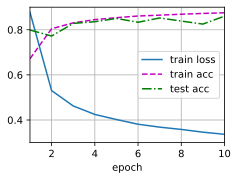

In [ ]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## [**简洁实现**]

对于深度学习框架的高级API，我们只需在每个全连接层之后添加一个`Dropout`层，
将暂退概率作为唯一的参数传递给它的构造函数。
在训练时，`Dropout`层将根据指定的暂退概率随机丢弃上一层的输出（相当于下一层的输入）。
在测试时，`Dropout`层仅传递数据。


In [ ]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

接下来，我们[**对模型进行训练和测试**]。


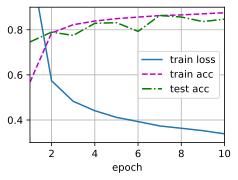

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 小结

* 暂退法在前向传播过程中，计算每一内部层的同时丢弃一些神经元。
* 暂退法可以避免过拟合，它通常与控制权重向量的维数和大小结合使用的。
* 暂退法将活性值$h$替换为具有期望值$h$的随机变量。
* 暂退法仅在训练期间使用。

## 练习

1. 如果更改第一层和第二层的暂退法概率，会发生什么情况？具体地说，如果交换这两个层，会发生什么情况？设计一个实验来回答这些问题，定量描述你的结果，并总结定性的结论。
1. 增加训练轮数，并将使用暂退法和不使用暂退法时获得的结果进行比较。
1. 当应用或不应用暂退法时，每个隐藏层中激活值的方差是多少？绘制一个曲线图，以显示这两个模型的每个隐藏层中激活值的方差是如何随时间变化的。
1. 为什么在测试时通常不使用暂退法？
1. 以本节中的模型为例，比较使用暂退法和权重衰减的效果。如果同时使用暂退法和权重衰减，会发生什么情况？结果是累加的吗？收益是否减少（或者说更糟）？它们互相抵消了吗？
1. 如果我们将暂退法应用到权重矩阵的各个权重，而不是激活值，会发生什么？
1. 发明另一种用于在每一层注入随机噪声的技术，该技术不同于标准的暂退法技术。尝试开发一种在Fashion-MNIST数据集（对于固定架构）上性能优于暂退法的方法。


# 数值稳定性和模型初始化
:label:`sec_numerical_stability`

到目前为止，我们实现的每个模型都是根据某个预先指定的分布来初始化模型的参数。
你可能认为初始化方案是理所当然的，忽略了如何做出这些选择的细节。
你甚至可能会觉得，初始化方案的选择并不是特别重要。
相反，初始化方案的选择在神经网络学习中起着举足轻重的作用，
它对保持数值稳定性至关重要。
此外，这些初始化方案的选择可以与非线性激活函数的选择有趣的结合在一起。
我们选择哪个函数以及如何初始化参数可以决定优化算法收敛的速度有多快。
糟糕选择可能会导致我们在训练时遇到梯度爆炸或梯度消失。
在本节中，我们将更详细地探讨这些主题，并讨论一些有用的启发式方法。
你会发现这些启发式方法在你的整个深度学习生涯中都很有用。

## 梯度消失和梯度爆炸

考虑一个具有$L$层、输入$\mathbf{x}$和输出$\mathbf{o}$的深层网络。
每一层$l$由变换$f_l$定义，
该变换的参数为权重$\mathbf{W}^{(l)}$，
其隐藏变量是$\mathbf{h}^{(l)}$（令 $\mathbf{h}^{(0)} = \mathbf{x}$）。
我们的网络可以表示为：

$$\mathbf{h}^{(l)} = f_l (\mathbf{h}^{(l-1)}) \text{ 因此 } \mathbf{o} = f_L \circ \ldots \circ f_1(\mathbf{x}).$$

如果所有隐藏变量和输入都是向量，
我们可以将$\mathbf{o}$关于任何一组参数$\mathbf{W}^{(l)}$的梯度写为下式：

$$\partial_{\mathbf{W}^{(l)}} \mathbf{o} = \underbrace{\partial_{\mathbf{h}^{(L-1)}} \mathbf{h}^{(L)}}_{ \mathbf{M}^{(L)} \stackrel{\mathrm{def}}{=}} \cdot \ldots \cdot \underbrace{\partial_{\mathbf{h}^{(l)}} \mathbf{h}^{(l+1)}}_{ \mathbf{M}^{(l+1)} \stackrel{\mathrm{def}}{=}} \underbrace{\partial_{\mathbf{W}^{(l)}} \mathbf{h}^{(l)}}_{ \mathbf{v}^{(l)} \stackrel{\mathrm{def}}{=}}.$$

换言之，该梯度是$L-l$个矩阵
$\mathbf{M}^{(L)} \cdot \ldots \cdot \mathbf{M}^{(l+1)}$
与梯度向量 $\mathbf{v}^{(l)}$的乘积。
因此，我们容易受到数值下溢问题的影响.
当将太多的概率乘在一起时，这些问题经常会出现。
在处理概率时，一个常见的技巧是切换到对数空间，
即将数值表示的压力从尾数转移到指数。
不幸的是，上面的问题更为严重：
最初，矩阵 $\mathbf{M}^{(l)}$ 可能具有各种各样的特征值。
他们可能很小，也可能很大；
他们的乘积可能非常大，也可能非常小。

不稳定梯度带来的风险不止在于数值表示；
不稳定梯度也威胁到我们优化算法的稳定性。
我们可能面临一些问题。
要么是*梯度爆炸*（gradient exploding）问题：
参数更新过大，破坏了模型的稳定收敛；
要么是*梯度消失*（gradient vanishing）问题：
参数更新过小，在每次更新时几乎不会移动，导致模型无法学习。

### (**梯度消失**)

曾经sigmoid函数$1/(1 + \exp(-x))$（ :numref:`sec_mlp`提到过）很流行，
因为它类似于阈值函数。
由于早期的人工神经网络受到生物神经网络的启发，
神经元要么完全激活要么完全不激活（就像生物神经元）的想法很有吸引力。
然而，它却是导致梯度消失问题的一个常见的原因，
让我们仔细看看sigmoid函数为什么会导致梯度消失。


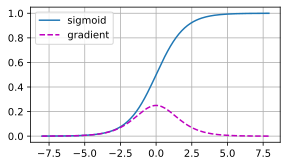

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

正如你所看到的，当sigmoid函数的输入很大或是很小时，它的梯度都会消失。
此外，当反向传播通过许多层时，除非我们在刚刚好的地方，
这些地方sigmoid函数的输入接近于零，否则整个乘积的梯度可能会消失。
当我们的网络有很多层时，除非我们很小心，否则在某一层可能会切断梯度。
事实上，这个问题曾经困扰着深度网络的训练。
因此，更稳定的ReLU系列函数已经成为从业者的默认选择（虽然在神经科学的角度看起来不太合理）。

### [**梯度爆炸**]

相反，梯度爆炸可能同样令人烦恼。
为了更好地说明这一点，我们生成100个高斯随机矩阵，并将它们与某个初始矩阵相乘。
对于我们选择的尺度（方差$\sigma^2=1$），矩阵乘积发生爆炸。
当这种情况是由于深度网络的初始化所导致时，我们没有机会让梯度下降优化器收敛。


In [ ]:
M = torch.normal(0, 1, size=(4,4))
print('一个矩阵 \n',M)
for i in range(100):
    M = torch.mm(M,torch.normal(0, 1, size=(4, 4)))

print('乘以100个矩阵后\n', M)

一个矩阵 
 tensor([[ 0.4382, -0.7687,  0.2731, -0.2587],
        [-0.1789, -0.2395,  1.4915,  0.2634],
        [-0.5272,  0.2403,  2.4397, -0.7587],
        [ 0.9805,  0.4166, -0.1906, -0.2581]])
乘以100个矩阵后
 tensor([[ 7.6616e+22,  4.2587e+22, -5.8065e+22,  1.2980e+23],
        [-2.3790e+21, -1.3224e+21,  1.8030e+21, -4.0304e+21],
        [-1.3796e+23, -7.6687e+22,  1.0456e+23, -2.3373e+23],
        [ 8.5987e+20,  4.7795e+20, -6.5167e+20,  1.4567e+21]])


### 打破对称性

神经网络设计中的另一个问题是其参数化所固有的对称性。
假设我们有一个简单的多层感知机，它有一个隐藏层和两个隐藏单元。
在这种情况下，我们可以对第一层的权重$\mathbf{W}^{(1)}$进行重排列，
并且同样对输出层的权重进行重排列，可以获得相同的函数。
第一个隐藏单元与第二个隐藏单元没有什么特别的区别。
换句话说，我们在每一层的隐藏单元之间具有排列对称性。

假设输出层将上述两个隐藏单元的多层感知机转换为仅一个输出单元。
想象一下，如果我们将隐藏层的所有参数初始化为$\mathbf{W}^{(1)} = c$，
$c$为常量，会发生什么？
在这种情况下，在前向传播期间，两个隐藏单元采用相同的输入和参数，
产生相同的激活，该激活被送到输出单元。
在反向传播期间，根据参数$\mathbf{W}^{(1)}$对输出单元进行微分，
得到一个梯度，其元素都取相同的值。
因此，在基于梯度的迭代（例如，小批量随机梯度下降）之后，
$\mathbf{W}^{(1)}$的所有元素仍然采用相同的值。
这样的迭代永远不会打破对称性，我们可能永远也无法实现网络的表达能力。
隐藏层的行为就好像只有一个单元。
请注意，虽然小批量随机梯度下降不会打破这种对称性，但暂退法正则化可以。

## 参数初始化

解决（或至少减轻）上述问题的一种方法是进行参数初始化，
优化期间的注意和适当的正则化也可以进一步提高稳定性。

### 默认初始化

在前面的部分中，例如在 :numref:`sec_linear_concise`中，
我们使用正态分布来初始化权重值。如果我们不指定初始化方法，
框架将使用默认的随机初始化方法，对于中等难度的问题，这种方法通常很有效。

### Xavier初始化
:label:`subsec_xavier`

让我们看看某些*没有非线性*的全连接层输出（例如，隐藏变量）$o_{i}$的尺度分布。
对于该层$n_\mathrm{in}$输入$x_j$及其相关权重$w_{ij}$，输出由下式给出

$$o_{i} = \sum_{j=1}^{n_\mathrm{in}} w_{ij} x_j.$$

权重$w_{ij}$都是从同一分布中独立抽取的。
此外，让我们假设该分布具有零均值和方差$\sigma^2$。
请注意，这并不意味着分布必须是高斯的，只是均值和方差需要存在。
现在，让我们假设层$x_j$的输入也具有零均值和方差$\gamma^2$，
并且它们独立于$w_{ij}$并且彼此独立。
在这种情况下，我们可以按如下方式计算$o_i$的平均值和方差：

$$
\begin{aligned}
    E[o_i] & = \sum_{j=1}^{n_\mathrm{in}} E[w_{ij} x_j] \\&= \sum_{j=1}^{n_\mathrm{in}} E[w_{ij}] E[x_j] \\&= 0, \\
    \mathrm{Var}[o_i] & = E[o_i^2] - (E[o_i])^2 \\
        & = \sum_{j=1}^{n_\mathrm{in}} E[w^2_{ij} x^2_j] - 0 \\
        & = \sum_{j=1}^{n_\mathrm{in}} E[w^2_{ij}] E[x^2_j] \\
        & = n_\mathrm{in} \sigma^2 \gamma^2.
\end{aligned}
$$

保持方差不变的一种方法是设置$n_\mathrm{in} \sigma^2 = 1$。
现在考虑反向传播过程，我们面临着类似的问题，尽管梯度是从更靠近输出的层传播的。
使用与前向传播相同的推断，我们可以看到，除非$n_\mathrm{out} \sigma^2 = 1$，
否则梯度的方差可能会增大，其中$n_\mathrm{out}$是该层的输出的数量。
这使得我们进退两难：我们不可能同时满足这两个条件。
相反，我们只需满足：

$$
\begin{aligned}
\frac{1}{2} (n_\mathrm{in} + n_\mathrm{out}) \sigma^2 = 1 \text{ 或等价于 }
\sigma = \sqrt{\frac{2}{n_\mathrm{in} + n_\mathrm{out}}}.
\end{aligned}
$$

这就是现在标准且实用的*Xavier初始化*的基础，
它以其提出者 :cite:`Glorot.Bengio.2010` 第一作者的名字命名。
通常，Xavier初始化从均值为零，方差
$\sigma^2 = \frac{2}{n_\mathrm{in} + n_\mathrm{out}}$
的高斯分布中采样权重。
我们也可以利用Xavier的直觉来选择从均匀分布中抽取权重时的方差。
注意均匀分布$U(-a, a)$的方差为$\frac{a^2}{3}$。
将$\frac{a^2}{3}$代入到$\sigma^2$的条件中，将得到初始化值域：

$$U\left(-\sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}, \sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}\right).$$

尽管在上述数学推理中，“不存在非线性”的假设在神经网络中很容易被违反，
但Xavier初始化方法在实践中被证明是有效的。

### 额外阅读

上面的推理仅仅触及了现代参数初始化方法的皮毛。
深度学习框架通常实现十几种不同的启发式方法。
此外，参数初始化一直是深度学习基础研究的热点领域。
其中包括专门用于参数绑定（共享）、超分辨率、序列模型和其他情况的启发式算法。
例如，Xiao等人演示了通过使用精心设计的初始化方法
 :cite:`Xiao.Bahri.Sohl-Dickstein.ea.2018`，
可以无须架构上的技巧而训练10000层神经网络的可能性。

如果你对该主题感兴趣，我们建议你深入研究本模块的内容，
阅读提出并分析每种启发式方法的论文，然后探索有关该主题的最新出版物。
也许你会偶然发现甚至发明一个聪明的想法，并为深度学习框架提供一个实现。

## 小结

* 梯度消失和梯度爆炸是深度网络中常见的问题。在参数初始化时需要非常小心，以确保梯度和参数可以得到很好的控制。
* 需要用启发式的初始化方法来确保初始梯度既不太大也不太小。
* ReLU激活函数缓解了梯度消失问题，这样可以加速收敛。
* 随机初始化是保证在进行优化前打破对称性的关键。
* Xavier初始化表明，对于每一层，输出的方差不受输入数量的影响，任何梯度的方差不受输出数量的影响。

## 练习

1. 除了多层感知机的排列对称性之外，你能设计出其他神经网络可能会表现出对称性且需要被打破的情况吗？
2. 我们是否可以将线性回归或softmax回归中的所有权重参数初始化为相同的值？
3. 在相关资料中查找两个矩阵乘积特征值的解析界。这对确保梯度条件合适有什么启示？
4. 如果我们知道某些项是发散的，我们能在事后修正吗？看看关于按层自适应速率缩放的论文 :cite:`You.Gitman.Ginsburg.2017` 。


[Discussions](https://discuss.d2l.ai/t/1818)
